# Action1_seealsology是个针对Wikipidea页面的语义分析工具，可以找到与指定页面相关的Wikipidea     

seealsology-data.tsv 文件存储了Wikipidea页面的关系（Source, Target, Depth）     使用Graph Embedding对节点（Wikipidea）进行Embedding（DeepWalk或Node2Vec模型）     对Embedding进行可视化（使用PCA呈现在二维平面上）     找到和critical illness insurance相关的页面

In [35]:
# 使用Graph Embedding中的DeepWalk对space_data进行压缩
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from GraphEmbedding.ge.models import DeepWalk  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('./seealsology-data.tsv',sep='\t')
df

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1
...,...,...,...
3739,health system,two-tier health care,4
3740,health system,universal health care,4
3741,health administration,master of health administration,4
3742,health administration,nosokinetics,4


In [39]:
#数据加载,构造图
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.Graph())

In [40]:
# 初始化Node2Vec模型
model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
# 模型训练
model.train(window_size=4, iter=20)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


Learning embedding vectors...
Learning embedding vectors done!


In [43]:
# 得到节点的embedding,是一个字典
embeddings = model.get_embeddings()
print(embeddings)
print(type(embeddings))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
# 每个节点为一个长度128的一维向量
embeddings['life insurance']

array([-0.7449993 , -0.4381278 ,  0.00696465, -0.5426709 , -0.02375362,
       -0.4673522 , -0.03144276,  0.34765497, -0.32217088,  0.60297024,
       -0.6325333 , -0.22646904, -0.10613332,  0.5998752 , -0.5261363 ,
       -0.10769103, -0.21087784,  0.08331793, -0.3750242 ,  0.3015332 ,
       -0.27885774,  0.39606363,  0.15056118, -0.72003233,  0.43332154,
       -0.18962242, -0.01752979,  0.20505776, -0.10134901,  0.04173452,
       -0.17876334,  0.21912627, -0.17369774,  0.7222629 , -0.3607146 ,
        0.29268685,  0.5346519 , -0.14317149,  0.31868607, -0.1128849 ,
        0.40154508, -0.03630909,  0.66699207,  0.04450743,  0.0922791 ,
        0.21314168,  0.6437543 ,  0.07161187, -0.21123475, -0.04808014,
       -0.19160594,  0.32807422,  0.5121306 ,  0.44408932,  0.09375955,
       -0.2782349 ,  0.28076836, -0.76002   , -0.7326536 ,  0.23257981,
       -0.42388093,  0.50579166, -0.04016583, -0.006737  ,  0.3764741 ,
        0.39591673,  0.04340502,  0.00113288,  0.3965269 , -0.40

In [52]:
embeddings['starve the beast'].shape

(128,)

In [51]:
model.w2v_model.wv.vocab

{'starve the beast': <gensim.models.keyedvectors.Vocab at 0x29792673f40>,
 'government budget deficit': <gensim.models.keyedvectors.Vocab at 0x29792abfd30>,
 'generational accounting': <gensim.models.keyedvectors.Vocab at 0x29792d78c10>,
 'demographic economics': <gensim.models.keyedvectors.Vocab at 0x297933c0eb0>,
 'income and fertility': <gensim.models.keyedvectors.Vocab at 0x297933c0e80>,
 'growth economics': <gensim.models.keyedvectors.Vocab at 0x297933c04f0>,
 'social security': <gensim.models.keyedvectors.Vocab at 0x297933c1430>,
 'santhara': <gensim.models.keyedvectors.Vocab at 0x297933c1580>,
 'fasting': <gensim.models.keyedvectors.Vocab at 0x297933c1490>,
 'force-feeding': <gensim.models.keyedvectors.Vocab at 0x297933c1670>,
 'vegetarianism and religion': <gensim.models.keyedvectors.Vocab at 0x297933c1610>,
 'fasting in jainism': <gensim.models.keyedvectors.Vocab at 0x297933c1760>,
 'simple living': <gensim.models.keyedvectors.Vocab at 0x297933c1790>,
 'downshifting (lifestyle

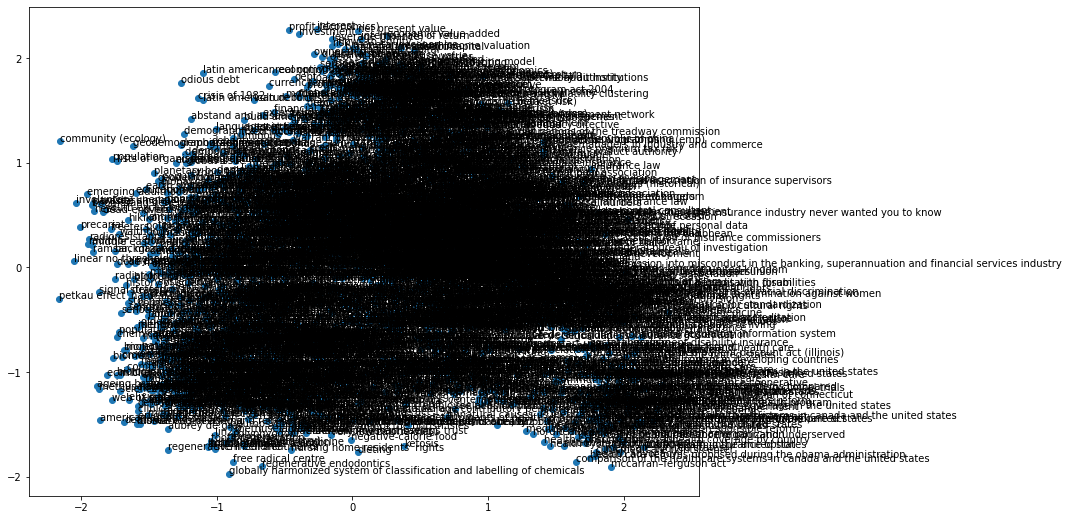

In [50]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为128维
    X = []
    for item in word_list:
        X.append(embeddings[item])

    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()

plot_nodes(model.w2v_model.wv.vocab)

In [53]:
from node2vec import Node2Vec
model2 = Node2Vec(G, walk_length = 10, num_walks = 5, p = 0.25, q = 4, workers = 1)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.83s/it]


In [59]:
model2 = model2.fit(window=4, iter=20)

In [61]:
print(model2.wv.most_similar('starve the beast'))
embeddings = model2.wv
print(embeddings)

[('current account', 0.9815210103988647), ('government budget deficit', 0.9784037470817566), ('national debt by u.s. presidential terms', 0.9750971794128418), ('sectoral balances', 0.9742164611816406), ('united states federal budget', 0.9707863926887512), ('deficit hawk', 0.9664168357849121), ('government budget', 0.863796055316925), ('fiscal policy of the united states', 0.8512200117111206), ('national debt of the united states', 0.8384256362915039), ('monetary policy', 0.8026724457740784)]


In [64]:
model2.vector_size

128

In [66]:
model2.wv.vectors.shape

(2399, 128)

# GraphEmbedding安装

* github上下载下来
* 把第六行读取数据的代码注释掉（或者参数加encoding="utf-8"）
* python setup.py install
* 如果安装报错可能是网络的问题，需要手动将setup.py里面的安装列表自行安装